In [92]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sns
sns.set()

pluto = pd.read_csv('pluto.csv')

In [93]:
pluto.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,CD,CT2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,...,PFIRM15_FLAG,lits,has_lit,311,hmc_v,hmc_c,dev,dev_agg,dc,dv
0,0,0,0,501,3.0,31.0,49.0,10301.0,L078,120.0,...,0.0,0,0,10,0,0,5,0,0,11
1,1,1,1,501,3.0,31.0,49.0,10301.0,L078,120.0,...,0.0,0,0,0,0,0,0,0,0,0
2,2,2,2,501,3.0,31.0,49.0,10301.0,L078,120.0,...,0.0,0,0,0,0,0,0,0,0,0
3,3,3,3,501,3.0,31.0,49.0,10301.0,L078,120.0,...,0.0,0,0,0,0,0,0,0,0,0
4,4,4,4,501,3.0,31.0,49.0,10301.0,L078,120.0,...,0.0,0,0,0,0,0,0,0,0,0


In [94]:
features = pluto[['311','hmc_v','hmc_c','dev','dev_agg','dc','dv']]
target = pluto['has_lit']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.33, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.33, random_state=10)

In [96]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
f1_score(lr.predict(X_train),y_train)

0.5279501361709297

In [97]:
f1_score(lr.predict(X_val),y_val)

0.5233473091723623

In [98]:
lr_b = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_b.fit(X_train,y_train)
f1_score(lr_b.predict(X_train),y_train)

0.5757069429194316

In [99]:
f1_score(lr_b.predict(X_val),y_val)

0.5793013809910643

Text(0.5,0,'False Positive Rate')

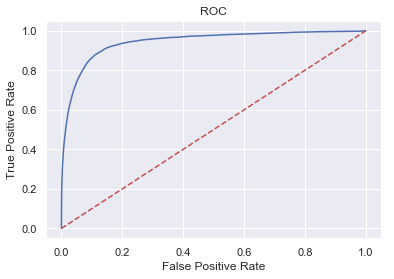

In [100]:
fpr, tpr, _ = roc_curve(y_val, lr_b.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)

plt.title('ROC')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [101]:
roc_auc_score(y_val,lr_b.predict(X_val))

0.8539745143456453

In [102]:
coefs2 = list()
for each in lr_b.coef_.tolist():
    for i in each:
        coefs2.append(i)
list(zip(['311','hmc_v','hmc_c','dev','dev_agg','dc','dv'],coefs2))

[('311', 0.01078996867130145),
 ('hmc_v', 0.09638601331155255),
 ('hmc_c', 0.16501737712867412),
 ('dev', 0.005578797105992772),
 ('dev_agg', 0.058717605702748386),
 ('dc', 0.034676227521374815),
 ('dv', -0.015419758807030736)]

In [103]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
f1_score(rf.predict(X_train),y_train)

0.893127321076521

In [104]:
f1_score(rf.predict(X_val),y_val)

0.5556180637242367

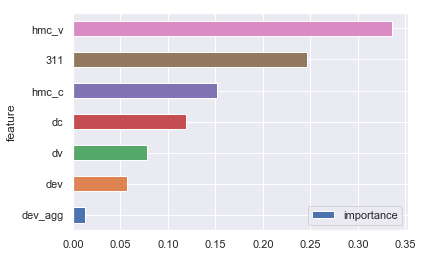

In [105]:
feat_imps = list(zip(features,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

Text(0.5,0,'False Positive Rate')

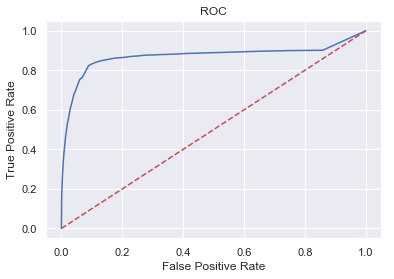

In [106]:
fpr, tpr, _ = roc_curve(y_val, rf.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)

plt.title('ROC')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [107]:
roc_auc_score(y_val,rf.predict(X_val))

0.726221817603621

In [108]:
rf_b = RandomForestClassifier(class_weight='balanced')
rf_b.fit(X_train,y_train)
f1_score(rf_b.predict(X_train),y_train)

0.8271195968600052

In [109]:
f1_score(rf_b.predict(X_val),y_val)

0.49565657029921406

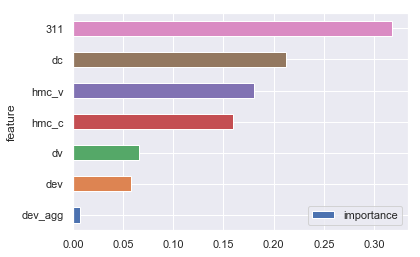

In [110]:
feat_imps = list(zip(features,rf_b.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

Text(0.5,0,'False Positive Rate')

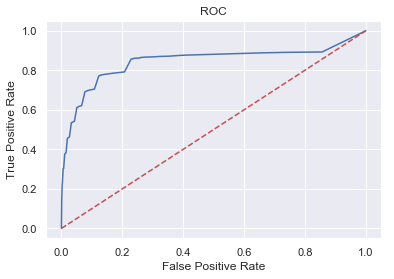

In [111]:
fpr, tpr, _ = roc_curve(y_val, rf_b.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)

plt.title('ROC')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [112]:
roc_auc_score(y_val,rf_b.predict(X_val))

0.7182129786685222

In [114]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
f1_score(xg.predict(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5997538840178434

In [115]:
f1_score(xg.predict(X_val),y_val)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5944896352663342

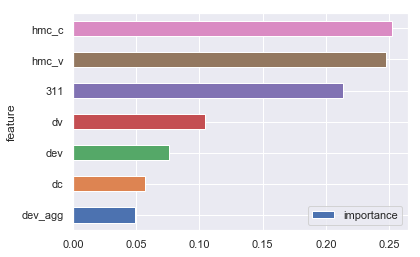

In [116]:
feat_imps = list(zip(features,xg.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

Text(0.5,0,'False Positive Rate')

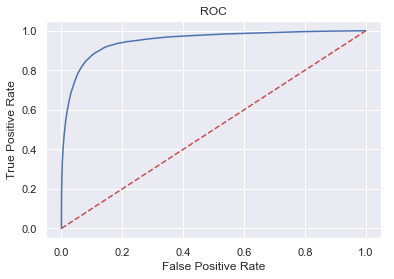

In [117]:
fpr, tpr, _ = roc_curve(y_val, xg.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)

plt.title('ROC')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [118]:
roc_auc_score(y_val,xg.predict(X_val))

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7382266014815119

In [119]:
pluto.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'CD', 'CT2010',
       'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'Address',
       'BldgClass', 'LandUse', 'OwnerType', 'LotArea', 'BldgArea', 'ComArea',
       'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea',
       'FactryArea', 'OtherArea', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'BsmtCode', 'AssessTot', 'YearBuilt', 'YearAlter1', 'YearAlter2',
       'BoroCode', 'BBL', 'XCoord', 'YCoord', 'PFIRM15_FLAG', 'lits',
       'has_lit', '311', 'hmc_v', 'hmc_c', 'dev', 'dev_agg', 'dc', 'dv'],
      dtype='object')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859212 entries, 0 to 859211
Data columns (total 45 columns):
Unnamed: 0      859212 non-null int64
Unnamed: 0.1    859212 non-null int64
CD              859212 non-null float64
CT2010          855138 non-null float64
SchoolDist      856441 non-null float64
Council         856209 non-null float64
ZipCode         855058 non-null float64
FireComp        859212 non-null object
PolicePrct      856260 non-null float64
Address         858700 non-null object
BldgClass       858725 non-null object
LandUse         859212 non-null float64
OwnerType       859212 non-null object
LotArea         859212 non-null int64
BldgArea        859212 non-null int64
ComArea         859212 non-null int64
ResArea         859212 non-null int64
OfficeArea      859212 non-null int64
RetailArea      859212 non-null int64
GarageArea      859212 non-null int64
StrgeArea       859212 non-null int64
FactryArea      859212 non-null int64
OtherArea       859212 non-null int

In [121]:
features = df[['LotArea', 'BldgArea', 'ComArea',
       'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea',
       'FactryArea', 'OtherArea', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'AssessTot', 'YearBuilt', 'YearAlter1', 'YearAlter2']]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.33, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.33, random_state=10)

In [123]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
f1_score(lr.predict(X_train),y_train)

0.12120541477629006

In [124]:
f1_score(lr.predict(X_val),y_val)

0.12293605523866707

In [125]:
lr_b = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_b.fit(X_train,y_train)
f1_score(lr_b.predict(X_train),y_train)

0.3084521908576687

In [126]:
f1_score(lr.predict(X_val),y_val)

0.12293605523866707

In [127]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
f1_score(rf.predict(X_train),y_train)

0.8904650049031905

In [128]:
f1_score(rf.predict(X_val),y_val)

0.331536867041753

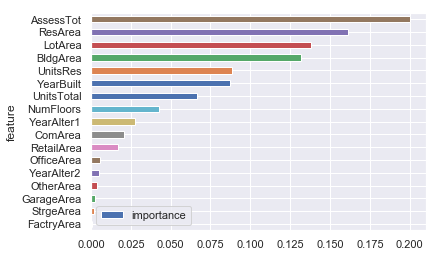

In [129]:
feat_imps = list(zip(features,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

In [130]:
rf_b = RandomForestClassifier(class_weight='balanced')
rf_b.fit(X_train,y_train)
f1_score(rf_b.predict(X_train),y_train)

0.8656224933507832

In [131]:
f1_score(rf_b.predict(X_val),y_val)

0.31971560771921903

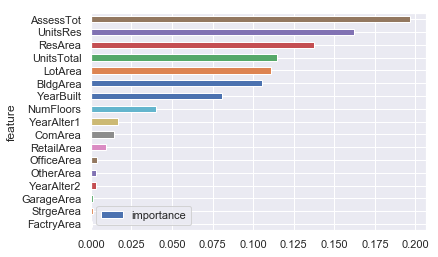

In [132]:
feat_imps = list(zip(features,rf_b.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

In [133]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
f1_score(xg.predict(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.33118692936088423

In [134]:
f1_score(xg.predict(X_val),y_val)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.3181997113239733

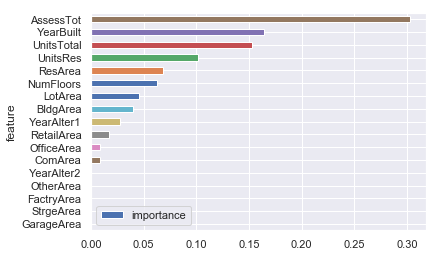

In [135]:
feat_imps = list(zip(features,xg.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

In [136]:
features = pluto[['311','hmc_v','hmc_c','dev','dev_agg','dc','dv', 'AssessTot']]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.33, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.33, random_state=10)

In [137]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
f1_score(lr.predict(X_train),y_train)

0.4989462942833692

In [138]:
f1_score(lr.predict(X_val),y_val)

0.4996817313812858

In [139]:
lr_b = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_b.fit(X_train,y_train)
f1_score(lr_b.predict(X_train),y_train)

0.42067412254840364

In [140]:
f1_score(lr_b.predict(X_val),y_val)

0.421817320409815

In [141]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
f1_score(rf.predict(X_train),y_train)

0.949353471932559

In [142]:
f1_score(rf.predict(X_val),y_val)

0.561600164541341

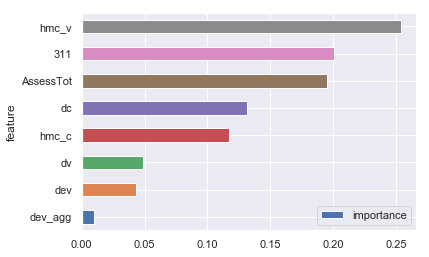

In [145]:
feat_imps = list(zip(features,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

In [143]:
rf_b = RandomForestClassifier(class_weight='balanced')
rf_b.fit(X_train,y_train)
f1_score(rf_b.predict(X_train),y_train)

0.9361775405213423

In [144]:
f1_score(rf_b.predict(X_val),y_val)

0.5354543564150551

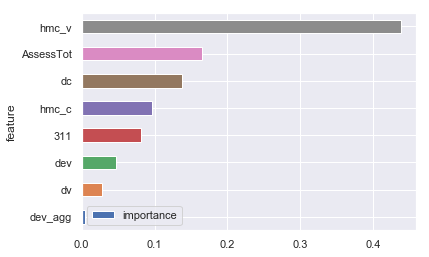

In [146]:
feat_imps = list(zip(features,rf_b.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

In [147]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
f1_score(xg.predict(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6064387957821813

In [148]:
f1_score(xg.predict(X_val),y_val)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6003029195174179

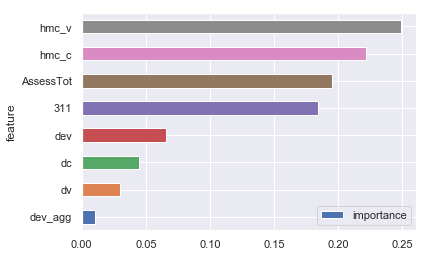

In [149]:
feat_imps = list(zip(features,xg.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

In [150]:
features = pluto[['311','hmc_v','hmc_c','dev','dc','dv', 'AssessTot']]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.33, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.33, random_state=10)

In [151]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
f1_score(xg.predict(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6072491415490271

In [152]:
f1_score(xg.predict(X_val),y_val)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6008861089392755

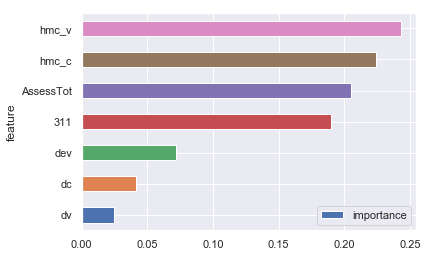

In [153]:
feat_imps = list(zip(features,xg.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

Text(0.5,0,'False Positive Rate')

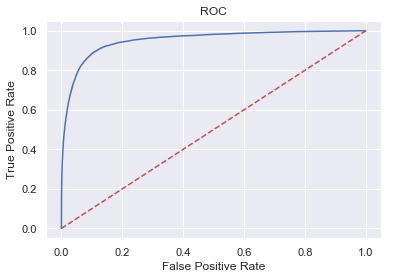

In [154]:
fpr, tpr, _ = roc_curve(y_val, xg.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)

plt.title('ROC')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [155]:
roc_auc_score(y_val,xg.predict(X_val))

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7424346983818506

In [171]:
features = pluto[['311','hmc_v','hmc_c', 'dev','dc','dv','AssessTot','ResArea']]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.33, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.33, random_state=10)

In [172]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
f1_score(xg.predict(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6081249523034264

In [173]:
f1_score(xg.predict(X_val),y_val)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.600573663624511

In [174]:
features = pluto[['311','hmc_v','hmc_c', 'dev','dc','dv','AssessTot','UnitsRes']]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.33, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.33, random_state=10)

In [175]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
f1_score(xg.predict(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6088082243939587

In [176]:
f1_score(xg.predict(X_val),y_val)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6017993655416298

In [186]:
features = pluto[['311','hmc_v','hmc_c', 'dev','dc','dv','AssessTot','UnitsRes','LotArea']]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.33, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.33, random_state=10)

In [187]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
f1_score(xg.predict(X_train),y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6089428005887428

In [188]:
f1_score(xg.predict(X_val),y_val)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6031795511221946

In [190]:
roc_auc_score(y_val,xg.predict(X_val))

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7441328202733577

Text(0.5,0,'False Positive Rate')

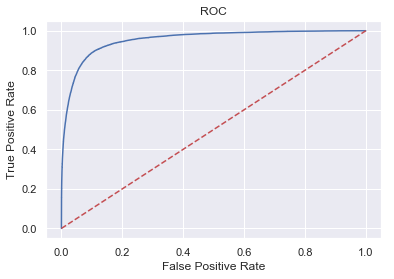

In [191]:
fpr, tpr, _ = roc_curve(y_val, xg.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr)

plt.title('ROC')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

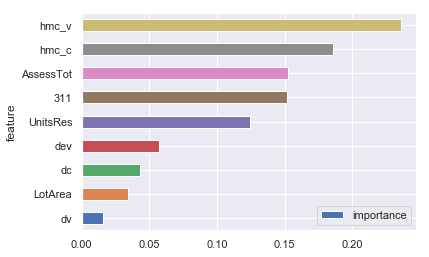

In [192]:
feat_imps = list(zip(features,xg.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

In [197]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
f1_score(lr.predict(X_train),y_train)

0.5195231217410463

In [198]:
lr_b = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_b.fit(X_train,y_train)
f1_score(lr_b.predict(X_train),y_train)

0.4131026309552026